In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Data.csv")
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [4]:
from sklearn.preprocessing import Imputer                #Imputer is a Class.

In [5]:
imputer = Imputer()

C:\Users\gauta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
data.iloc[ : , 1 : 3 ]                       #1, 2 -  <3

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [7]:
imputer = imputer.fit( data.iloc[ : , 1 : 3 ] )
print( data.isnull().sum() )

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


In [8]:
imputer.transform( data.iloc[ :, 1: 3] )

array([[4.40000000e+01, 7.20000000e+04],
       [2.70000000e+01, 4.80000000e+04],
       [3.00000000e+01, 5.40000000e+04],
       [3.80000000e+01, 6.10000000e+04],
       [4.00000000e+01, 6.37777778e+04],
       [3.50000000e+01, 5.80000000e+04],
       [3.87777778e+01, 5.20000000e+04],
       [4.80000000e+01, 7.90000000e+04],
       [5.00000000e+01, 8.30000000e+04],
       [3.70000000e+01, 6.70000000e+04]])

In [9]:
data.iloc[ :, 1: 3] = imputer.transform( data.iloc[ :, 1: 3] )
print()
print( data.isnull().sum() )


Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


In [10]:
print( data.head() )

data1 = data.copy()

print()
print("New Data Copied, \n")
print( data1.head() )

#France -> 0
#Spain -> 1
#Germany -> 2

   Country   Age        Salary Purchased
0   France  44.0  72000.000000        No
1    Spain  27.0  48000.000000       Yes
2  Germany  30.0  54000.000000        No
3    Spain  38.0  61000.000000        No
4  Germany  40.0  63777.777778       Yes

New Data Copied, 

   Country   Age        Salary Purchased
0   France  44.0  72000.000000        No
1    Spain  27.0  48000.000000       Yes
2  Germany  30.0  54000.000000        No
3    Spain  38.0  61000.000000        No
4  Germany  40.0  63777.777778       Yes


In [11]:
data1.Country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
#Applying Label Encoder on Columns having String Values.
#We always apply Label Encoder only after Fixing the null values.

#We can't use String data For Machine Learning Training. So, we need to convert String into Integer values.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
data1.iloc[ :,  : 1 ]

,Country
0,France
1,Spain
2,Germany
3,Spain
4,Germany
5,France
6,Spain
7,France
8,Germany
9,France


In [16]:
le.fit_transform( data1.iloc[ :, : 1 ] )    #We are doing Label Encoder on 1st Columns i.e., Country

C:\Users\gauta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

In [17]:
print( data1 )    #Still our data has not been updated so, We will have to update the action in same column

   Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  63777.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes


In [18]:
data1.iloc[ :, : 1 ] = le.fit_transform( data1.iloc[ :, : 1 ] )

print( data1 )

   Country        Age        Salary Purchased
0        0  44.000000  72000.000000        No
1        2  27.000000  48000.000000       Yes
2        1  30.000000  54000.000000        No
3        2  38.000000  61000.000000        No
4        1  40.000000  63777.777778       Yes
5        0  35.000000  58000.000000       Yes
6        2  38.777778  52000.000000        No
7        0  48.000000  79000.000000       Yes
8        1  50.000000  83000.000000        No
9        0  37.000000  67000.000000       Yes


In [19]:
'''
Note :- Steps To be followed to use label Encoder,

Step 1 :- Import LabelEncoder
Step 2 :- Make Object of Label Encoder.
Step 3 :- Label_Encoder_Object.fit_transform( dataFrame( Specific Column ) )

'''

'\nNote :- Steps To be followed to use label Encoder,\n\nStep 1 :- Import LabelEncoder\nStep 2 :- Make Object of Label Encoder.\nStep 3 :- Label_Encoder_Object.fit_transform( dataFrame( Specific Column ) )\n\n'

In [20]:
print(f"data.Country.unique() = { data1.Country.unique() }")

'''
As, we can see that 0 has been alloted to France, 1 to Germany and 2 to Spain.

Problem of Using Label Encoder in this Example is, After Conversion if we train our data then, it will compare 0 < 1 < 2.
But, We can't compare Countries as all are same and unique.

So, We need Dummy Variable.
'''

data1.head()

data.Country.unique() = [0 2 1]


,Country,Age,Salary,Purchased
0,0,44.0,72000.000000,No
1,2,27.0,48000.000000,Yes
2,1,30.0,54000.000000,No
3,2,38.0,61000.000000,No
4,1,40.0,63777.777778,Yes


In [21]:
from IPython.display import Image               #We Use Images Variable to Display Images in Jupyter Notebook

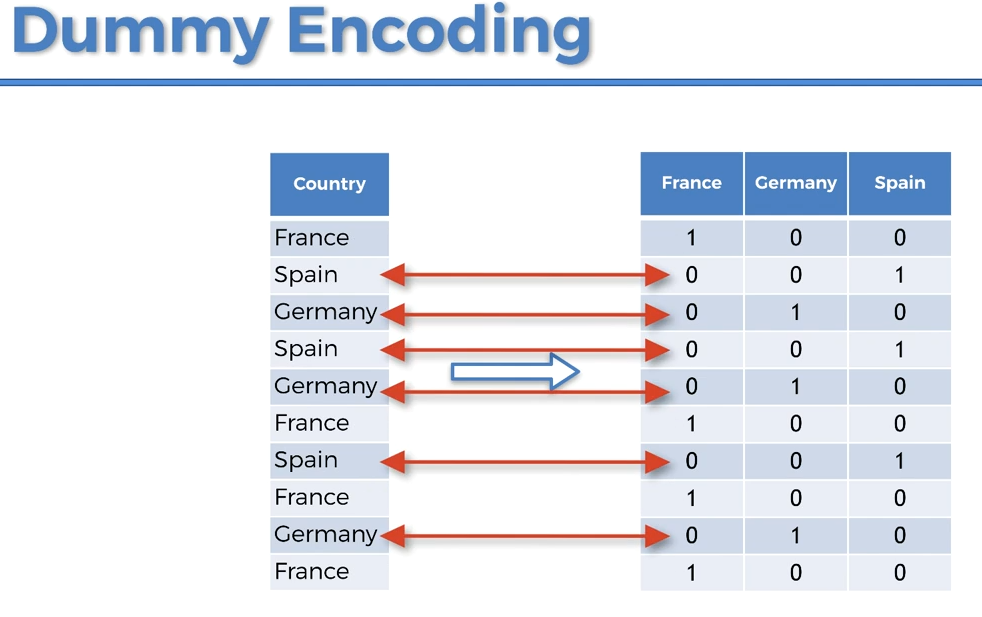

In [29]:
Image(filename='Images/Dummy Variable Implementation.png')

In [30]:
data2 = pd.read_csv("Data.csv")
print( data2.head() )
print()
print( data1.head() )

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes

   Country   Age        Salary Purchased
0        0  44.0  72000.000000        No
1        2  27.0  48000.000000       Yes
2        1  30.0  54000.000000        No
3        2  38.0  61000.000000        No
4        1  40.0  63777.777778       Yes


In [31]:
print( f"data1.isnull().sum() = { data1.isnull().sum() }\n" )
print( f"data2.isnull().sum() = { data2.isnull().sum() }" )

data1.isnull().sum() = Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

data2.isnull().sum() = Country      0
Age          1
Salary       1
Purchased    0
dtype: int64
